Errors
===
Iterative methodd and root finding
---

Find x such that f(x) = 0

Approx method starts with a guess and continues with halving the intervals


In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def bisection_method(f, a, b, tolerance, max_iter):
    if f(a) * f(b) >= 0:
        print ("Bisection method fails.")
        return None
    
    a_n = a
    b_n = b

    for n in range(1, max_iter + 1):
        m_n = (a_n + b_n) / 2
        f_m_n = f(m_n)

        if abs(f_m_n) < tolerance:
            print ("Found solution after",n,"iterations.")
            return m_n
        elif f(a_n) * f_m_n < 0:
            b_n = m_n
        elif f(b_n) * f_m_n < 0:
            a_n = m_n
        else:
            print ("Bisection method fails.")
            return None
    return None

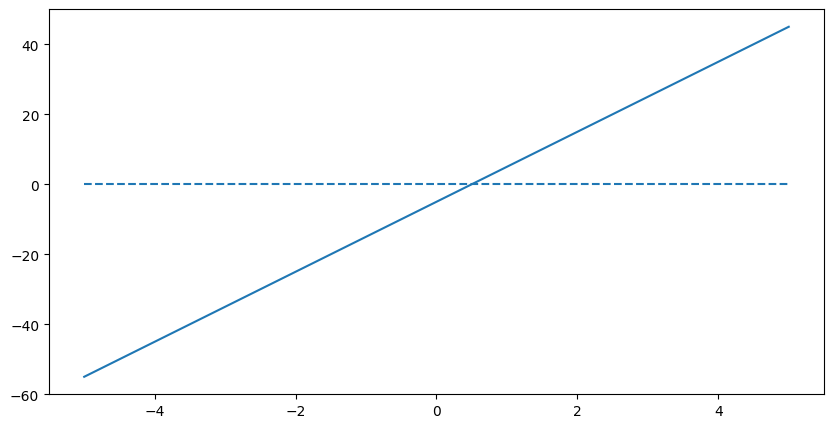

In [106]:
def f(x, a, b):
    return a*x + b

x = np.linspace(-5, 5, 100)

a = 10
b = -5
y = f(x, a, b)

_ = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.hlines(0, x[0], x[-1], linestyles='dashed')
plt.show()

In [107]:
from functools import partial

f1 = partial(f, a=a, b=b)


x0 = bisection_method(f1, -1, 3, 0.01, 200)
x0

Found solution after 3 iterations.


0.5

Newton method
===

In [108]:
def newton_method(f, x0, tolerance, max_iters):
    solutions = [x0]
    xn = x0
    for n in range(max_iters):
        fxn = f(xn)

        if abs(fxn) < tolerance:
            print('Found solution after',n,'iterations.')
            return solutions
        dfxn = (f(xn + 0.01) - f(xn)) / 0.01

        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return solutions
        
        xn = xn - fxn / dfxn
        solutions.append(xn)

    print('Exceeded maximum iterations. No solution found.')
    return solutions

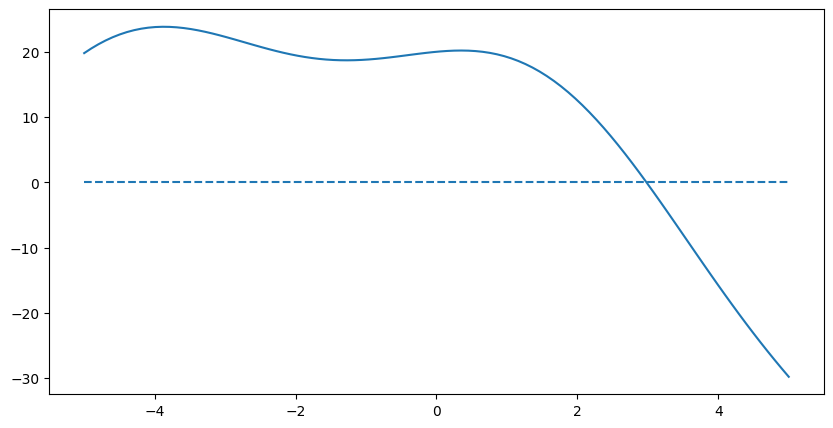

In [109]:
def g(x):
    return -x**2 - 4*x + 5*np.sin(x) + 20

x = np.linspace(-5, 5, 100)

y = g(x)

_ = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.hlines(0, x[0], x[-1], linestyles='dashed')
plt.show()

Found solution after 4 iterations.


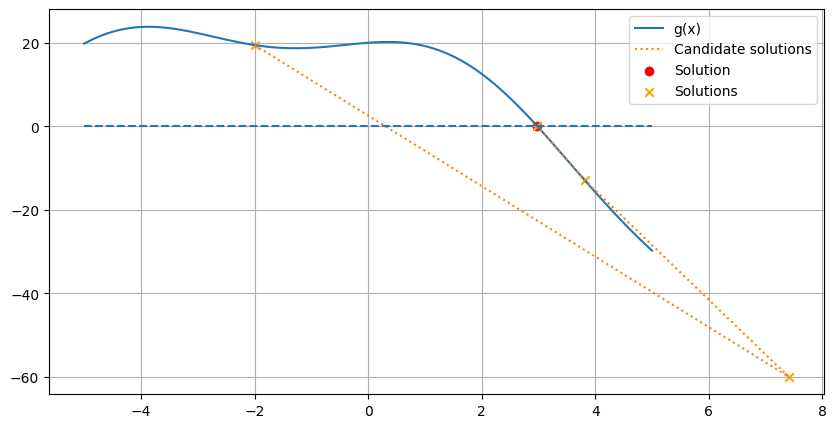

In [110]:
solutions = newton_method(g, -2, 0.001, 100)
y_solutios = [g(xi) for xi in solutions]

_ = plt.figure(figsize=(10, 5))
plt.plot(x, y, label = "g(x)")
plt.plot(solutions, y_solutios, linestyle = ":", label = "Candidate solutions")
plt.scatter(solutions[-1], g(solutions[-1]), marker = "o", color = "red", label = "Solution")
plt.scatter(solutions, y_solutios, marker = "x", color = "orange", label = "Solutions")
plt.hlines(0, x[0], x[-1], linestyles='dashed')
plt.legend()
plt.grid()
plt.show()